# Exploratory Data Analysis

## Importing libraries:

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and exploring our data:

In [2]:
df = pd.read_csv('/Users/hamzaalbustanji/Documents/GitHub/House-Price-prediction-API/data/df_cleaned.csv', index_col=0)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea Fence MoSold YrSold  SaleType  SaleCondition SalePrice  
0        0  none      2   2008        WD         Normal    208500  
1        0  none      5   2007        WD         Normal    181500  
2        0  none      9   2008        WD         Normal    223500  
3        0  none      2   2006        WD        Abnorml    140000  
4        0  none     12   2008        WD         Normal    250000  

[5 rows x 76 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   object 
 16  OverallCond    1459 non-null   object 
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

## Analyizing out target feature, SalePrice:

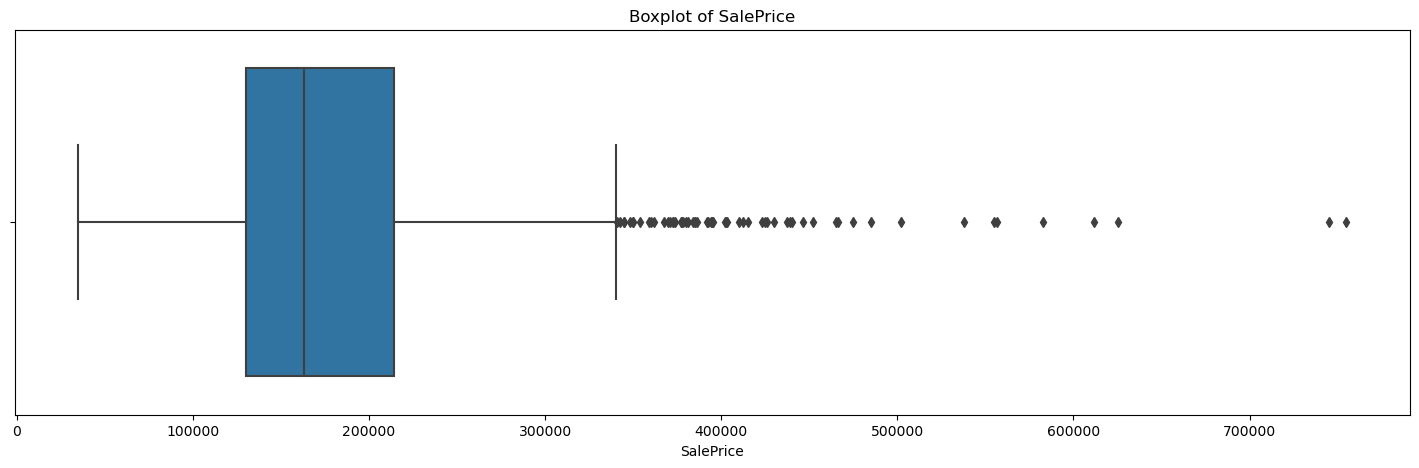

In [4]:
plt.figure(figsize=(18,5))
plt.title('Boxplot of SalePrice')
sns.boxplot(data = df, x = 'SalePrice');

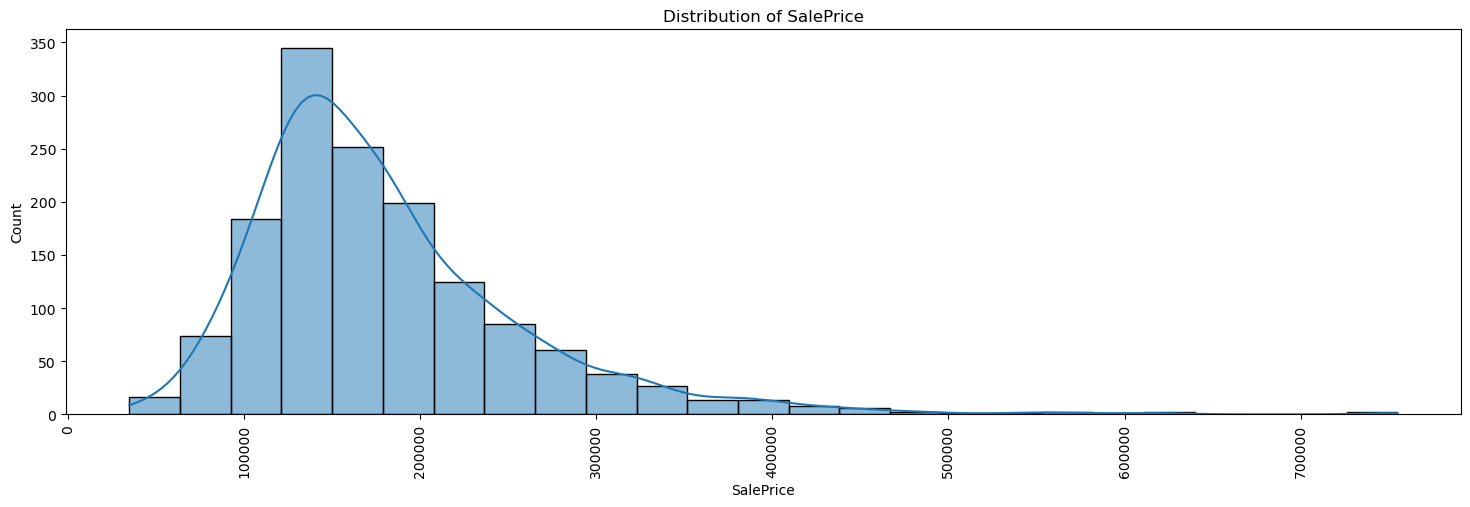

In [5]:
plt.figure(figsize = (18,5))
plt.xticks(rotation=90)
plt.title('Distribution of SalePrice')
sns.histplot(data = df, x = df['SalePrice'],bins=25, kde = True);

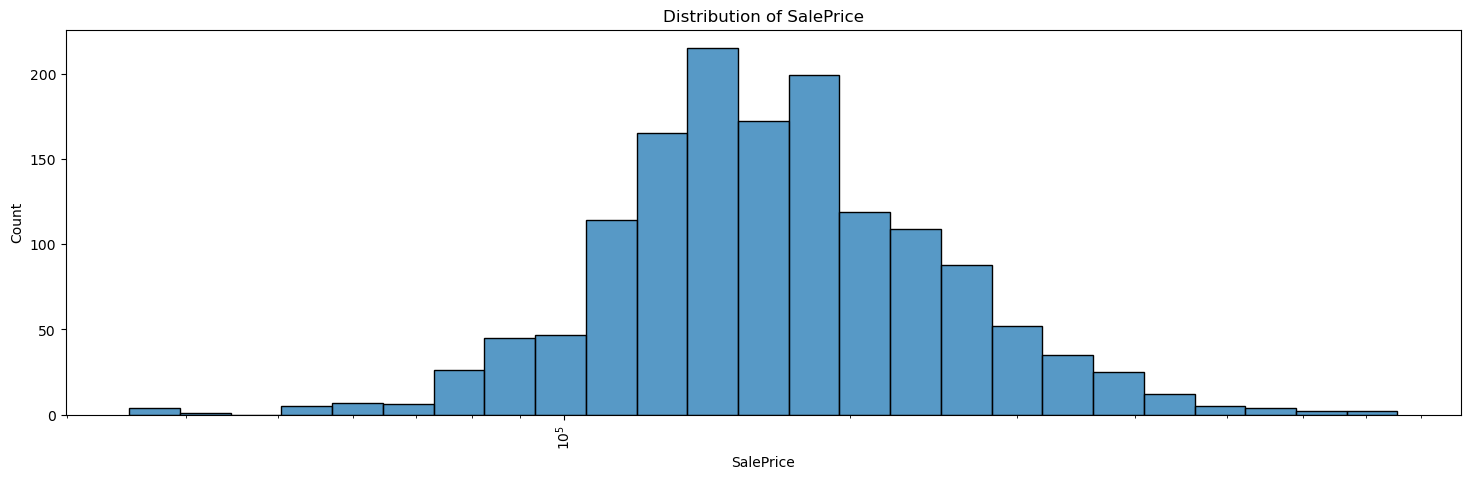

In [46]:
plt.figure(figsize = (18,5))
plt.xticks(rotation=90)
plt.title('Distribution of SalePrice with Log Scale')
sns.histplot(data = df, x = df['SalePrice'],bins=25, log_scale=True);

The SalePrice attribute is skewed to the right, le'ts take a look at the outliers:

In [6]:
df.nlargest(columns = 'SalePrice',n = 10).sort_values(by = 'SalePrice', ascending = False)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
691           60       RL        104.0    21535   Pave      IR1         Lvl   
1182          60       RL        160.0    15623   Pave      IR1         Lvl   
1169          60       RL        118.0    35760   Pave      IR1         Lvl   
898           20       RL        100.0    12919   Pave      IR1         Lvl   
803           60       RL        107.0    13891   Pave      Reg         Lvl   
1046          60       RL         85.0    16056   Pave      IR1         Lvl   
440           20       RL        105.0    15431   Pave      Reg         Lvl   
769           60       RL         47.0    53504   Pave      IR2         HLS   
178           20       RL         63.0    17423   Pave      IR1         Lvl   
798           60       RL        104.0    13518   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
691     AllPub    Corner       Gtl  ...             0         0           0   
1182    AllPub    Corner       Gtl  ...             0         0           0   
1169    AllPub   CulDSac       Gtl  ...             0         0           0   
898     AllPub    Inside       Gtl  ...             0         0           0   
803     AllPub    Inside       Gtl  ...             0         0         192   
1046    AllPub    Inside       Gtl  ...             0         0           0   
440     AllPub    Inside       Gtl  ...             0         0         170   
769     AllPub   CulDSac       Mod  ...             0         0         210   
178     AllPub   CulDSac       Gtl  ...             0         0           0   
798     AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea  Fence MoSold YrSold  SaleType  SaleCondition SalePrice  
691         0   none      1   2007        WD         Normal    755000  
1182      555  MnPrv      7   2007        WD        Abnorml    745000  
1169        0   none      7   2006        WD         Normal    625000  
898         0   none      3   2010       New        Partial    611657  
803         0   none      1   2009       New        Partial    582933  
1046        0   none      7   2006       New        Partial    556581  
440         0   none      4   2009        WD         Normal    555000  
769         0   none      6   2010        WD         Normal    538000  
178         0   none      7   2009       New        Partial    501837  
798         0   none      7   2009       New        Partial    485000  

[10 rows x 76 columns]

In [7]:
df.nsmallest(columns = 'SalePrice',n = 10).sort_values(by = 'SalePrice', ascending = True)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
495           30  C (all)         60.0     7879   Pave      Reg         Lvl   
916           20  C (all)         50.0     9000   Pave      Reg         Lvl   
968           50       RM         50.0     5925   Pave      Reg         Lvl   
533           20       RL         50.0     5000   Pave      Reg         Low   
30            70  C (all)         50.0     8500   Pave      Reg         Lvl   
710           30       RL         56.0     4130   Pave      IR1         Lvl   
1337          30       RM        153.0     4118   Pave      IR1         Bnk   
705          190       RM         70.0     5600   Pave      Reg         Lvl   
1325          30       RM         40.0     3636   Pave      Reg         Lvl   
812           20  C (all)         66.0     8712   Grvl      Reg         Bnk   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
495     AllPub    Inside       Gtl  ...           115         0           0   
916     AllPub    Inside       Gtl  ...             0         0           0   
968     AllPub    Inside       Gtl  ...             0         0           0   
533     AllPub    Inside       Mod  ...             0         0           0   
30      AllPub    Inside       Gtl  ...           172         0           0   
710     AllPub    Inside       Gtl  ...             0         0           0   
1337    AllPub    Corner       Mod  ...             0         0           0   
705     AllPub    Inside       Gtl  ...             0         0           0   
1325    AllPub    Inside       Gtl  ...           100         0           0   
812     AllPub    Inside       Mod  ...             0         0           0   

     PoolArea  Fence MoSold YrSold  SaleType  SaleCondition SalePrice  
495         0   GdWo     11   2009        WD        Abnorml     34900  
916         0   none     10   2006        WD        Abnorml     35311  
968         0   GdWo      5   2009        WD        Abnorml     37900  
533         0   none      1   2007        WD         Normal     39300  
30          0  MnPrv      7   2008        WD         Normal     40000  
710         0   none      7   2008        WD         Normal     52000  
1337        0   none      3   2006        WD         Normal     52500  
705         0   none      7   2010        WD         Normal     55000  
1325        0  MnPrv      1   2008        WD         Normal     55000  
812         0   none      6   2010        WD         Alloca     55993  

[10 rows x 76 columns]

In [10]:
df['SalePrice'].describe()

count      1459.000000
mean     180788.174092
std       79306.921182
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Categorical features:

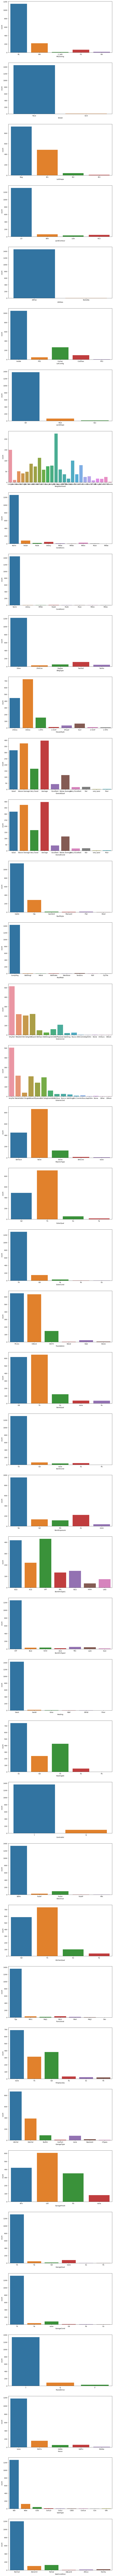

In [11]:
object_columns = df.select_dtypes('object').columns
fig,ax = plt.subplots(nrows = len(object_columns), figsize = (12, 300))
for j in range(len(object_columns)):
    sns.countplot(data = df, x = object_columns[j],ax = ax[j])

Some columnns are redundant or don't contain much information so we will drop them:

In [13]:
df=df.drop(columns=['BsmtFinSF2','Utilities','Condition2','RoofMatl','BsmtFinType2',
                    'Heating','Functional','Street'], axis=1)

In [14]:
df['MSZoning'].value_counts()

RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

From data description: 

MSZoning: Identifies the general zoning classification of the sale:

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density


It looks like most of the houses are in a 'Residential Low Density' zoning.</br>
Moving on:

## Numeric features:

In [21]:
df.select_dtypes('number').describe().transpose()

count           mean           std      min       25%  \
MSSubClass     1459.0      56.922550     42.304033     20.0      20.0   
LotFrontage    1459.0      57.559973     34.591636      0.0      42.0   
LotArea        1459.0   10376.507197   8421.813031   1300.0    7549.0   
YearBuilt      1459.0    1971.272104     30.212814   1872.0    1954.0   
YearRemodAdd   1459.0    1984.879369     20.645927   1950.0    1967.0   
MasVnrArea     1459.0     103.187800    180.773158      0.0       0.0   
BsmtFinSF1     1459.0     443.096642    455.782007      0.0       0.0   
BsmtUnfSF      1459.0     567.574366    441.834110      0.0     223.5   
TotalBsmtSF    1459.0    1056.690199    437.945128      0.0     795.5   
1stFlrSF       1459.0    1162.028101    386.042815    334.0     882.0   
2ndFlrSF       1459.0     347.230295    436.583480      0.0       0.0   
LowQualFinSF   1459.0       5.848526     48.639512      0.0       0.0   
GrLivArea      1459.0    1515.106923    525.483637    334.0    1129.0   
BsmtFullBath   1459.0       0.424263      0.517447      0.0       0.0   
BsmtHalfBath   1459.0       0.057574      0.238830      0.0       0.0   
FullBath       1459.0       1.564770      0.550987      0.0       1.0   
HalfBath       1459.0       0.383139      0.502958      0.0       0.0   
BedroomAbvGr   1459.0       2.866347      0.816050      0.0       2.0   
KitchenAbvGr   1459.0       1.046607      0.220410      0.0       1.0   
TotRmsAbvGrd   1459.0       6.516792      1.625487      2.0       5.0   
Fireplaces     1459.0       0.612063      0.643863      0.0       0.0   
GarageYrBlt    1459.0    1978.598355     24.002610   1900.0    1962.0   
GarageCars     1459.0       1.766964      0.747546      0.0       1.0   
GarageArea     1459.0     472.952707    213.875580      0.0     333.0   
WoodDeckSF     1459.0      94.309116    125.357458      0.0       0.0   
OpenPorchSF    1459.0      46.692255     66.267472      0.0       0.0   
EnclosedPorch  1459.0      21.969157     61.137400      0.0       0.0   
3SsnPorch      1459.0       3.411926     29.327247      0.0       0.0   
ScreenPorch    1459.0      15.071282     55.775138      0.0       0.0   
PoolArea       1459.0       2.760795     40.191018      0.0       0.0   
MoSold         1459.0       6.322138      2.704540      1.0       5.0   
YrSold         1459.0    2007.814942      1.328188   2006.0    2007.0   
SalePrice      1459.0  180788.174092  79306.921182  34900.0  129950.0   

                    50%       75%       max  
MSSubClass         50.0      70.0     190.0  
LotFrontage        63.0      79.0     313.0  
LotArea          9477.0   11600.0  164660.0  
YearBuilt        1973.0    2000.0    2010.0  
YearRemodAdd     1994.0    2004.0    2010.0  
MasVnrArea          0.0     164.5    1600.0  
BsmtFinSF1        383.0     712.0    5644.0  
BsmtUnfSF         479.0     808.0    2336.0  
TotalBsmtSF       991.0    1297.5    6110.0  
1stFlrSF         1086.0    1391.0    4692.0  
2ndFlrSF            0.0     728.0    2065.0  
LowQualFinSF        0.0       0.0     572.0  
GrLivArea        1464.0    1776.0    5642.0  
BsmtFullBath        0.0       1.0       3.0  
BsmtHalfBath        0.0       0.0       2.0  
FullBath            2.0       2.0       3.0  
HalfBath            0.0       1.0       2.0  
BedroomAbvGr        3.0       3.0       8.0  
KitchenAbvGr        1.0       1.0       3.0  
TotRmsAbvGrd        6.0       7.0      14.0  
Fireplaces          1.0       1.0       3.0  
GarageYrBlt      1980.0    2001.0    2010.0  
GarageCars          2.0       2.0       4.0  
GarageArea        480.0     576.0    1418.0  
WoodDeckSF          0.0     168.0     857.0  
OpenPorchSF        25.0      68.0     547.0  
EnclosedPorch       0.0       0.0     552.0  
3SsnPorch           0.0       0.0     508.0  
ScreenPorch         0.0       0.0     480.0  
PoolArea            0.0       0.0     738.0  
MoSold              6.0       8.0      12.0  
YrSold           2008.0    2009.0    2010.0  
SalePrice      

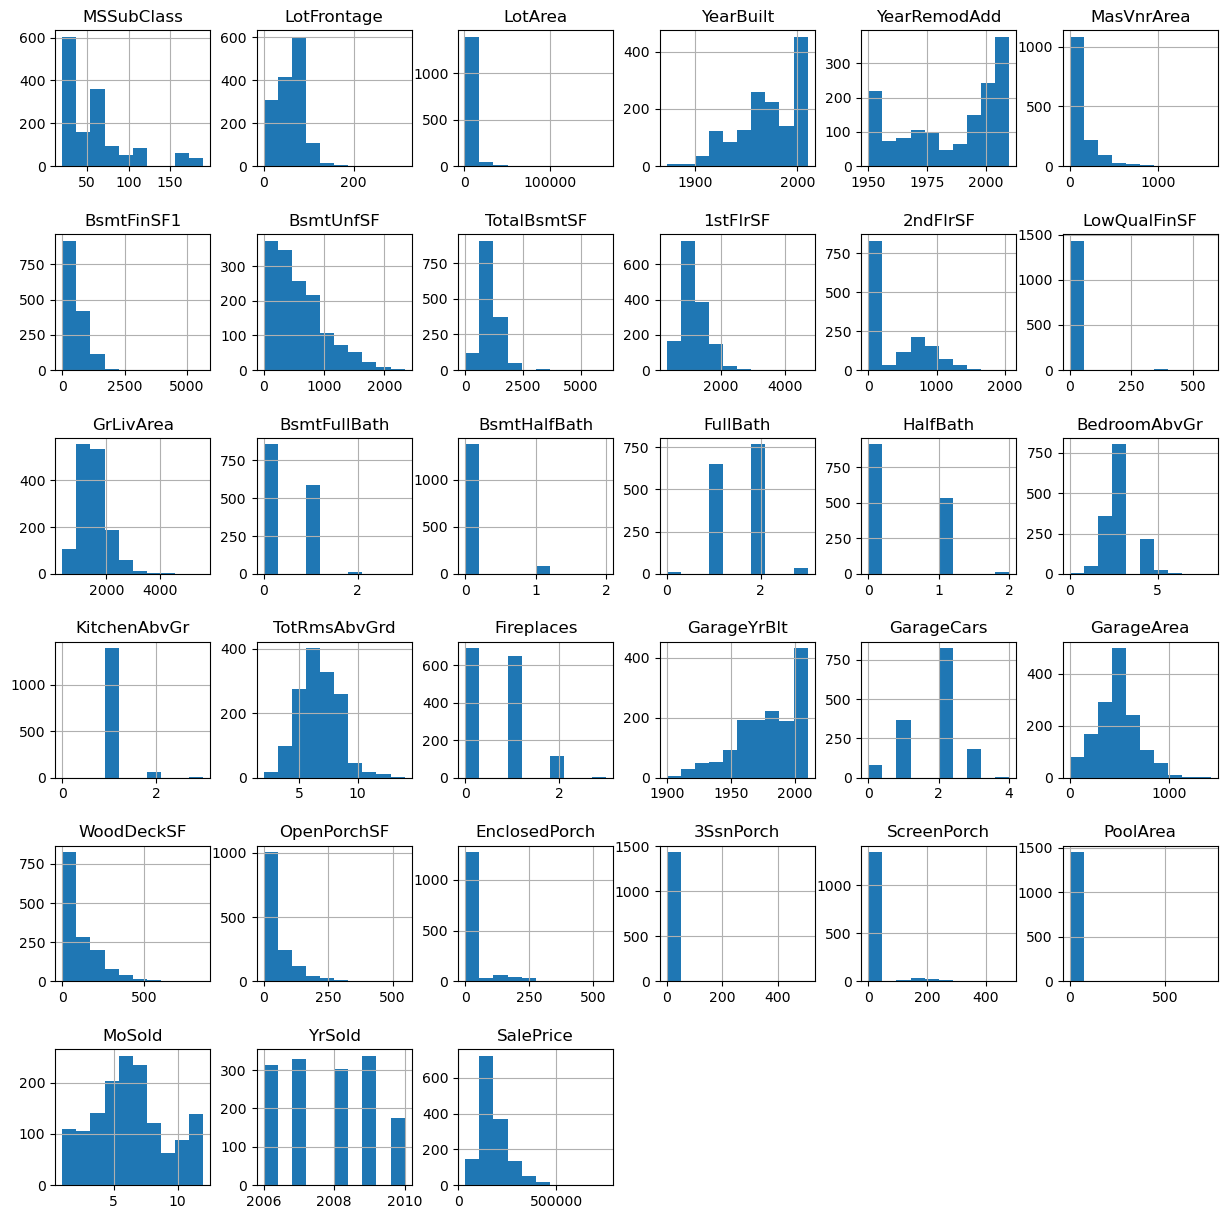

In [37]:
df.hist(figsize=(15,15))
plt.subplots_adjust(hspace=0.5);

## Correlation between features:

In [54]:
corr = df.select_dtypes(exclude='object').corr()

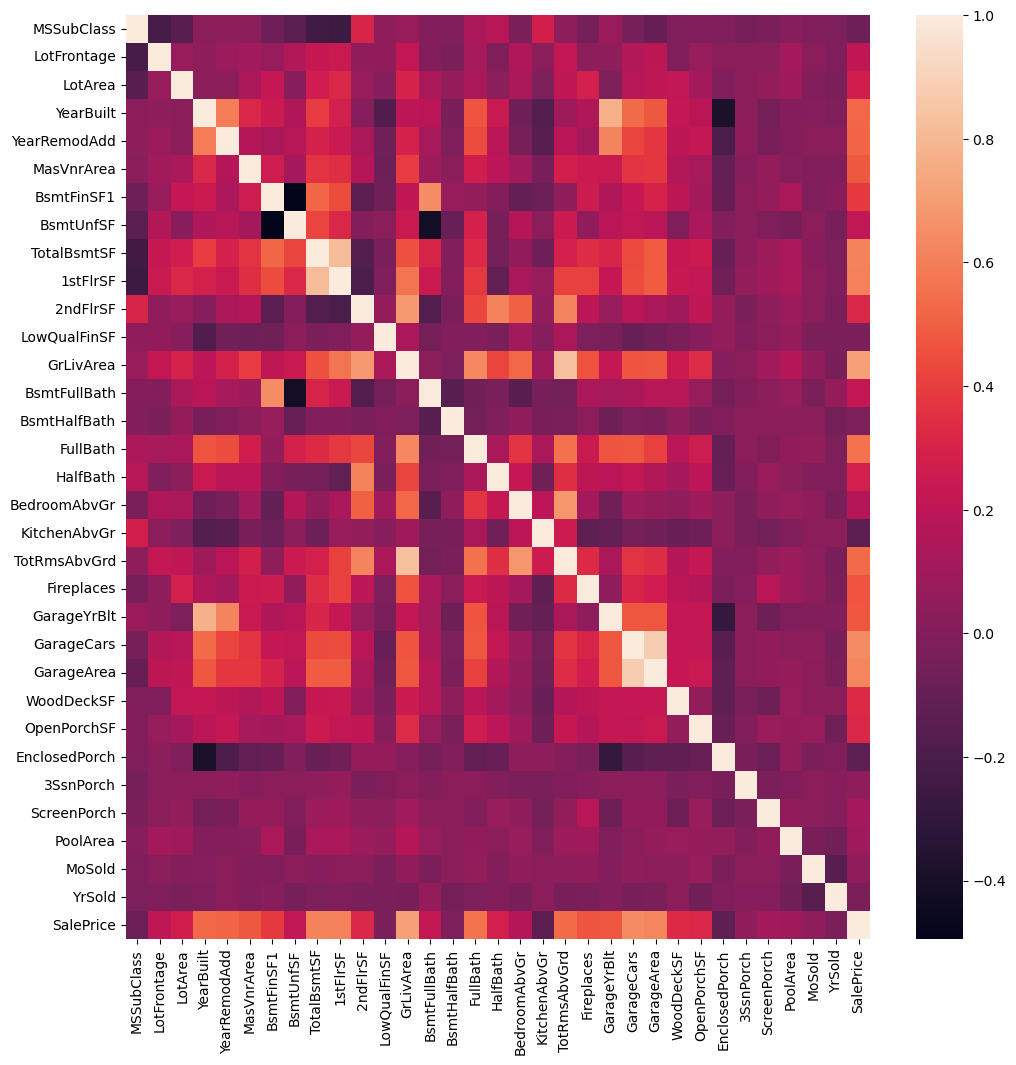

In [57]:
plt.figure(figsize=(12,12))
sns.heatmap(corr);

In [68]:
corr.nlargest(columns = 'SalePrice',n = 30)['SalePrice']

SalePrice       1.000000
GrLivArea       0.708655
GarageCars      0.641222
GarageArea      0.624405
TotalBsmtSF     0.611982
1stFlrSF        0.604362
FullBath        0.560609
TotRmsAbvGrd    0.533440
YearBuilt       0.524327
YearRemodAdd    0.509920
MasVnrArea      0.474596
GarageYrBlt     0.468714
Fireplaces      0.465014
BsmtFinSF1      0.384695
WoodDeckSF      0.326405
2ndFlrSF        0.321394
OpenPorchSF     0.317741
HalfBath        0.286026
LotArea         0.272618
BsmtFullBath    0.223199
BsmtUnfSF       0.216861
LotFrontage     0.206082
BedroomAbvGr    0.168285
ScreenPorch     0.112132
PoolArea        0.092709
MoSold          0.046728
3SsnPorch       0.044871
BsmtHalfBath   -0.016474
LowQualFinSF   -0.025457
YrSold         -0.030487
Name: SalePrice, dtype: float64

In [70]:
corr.nsmallest(columns = 'SalePrice',n = 10)['SalePrice']

KitchenAbvGr    -0.135834
EnclosedPorch   -0.128244
MSSubClass      -0.083014
YrSold          -0.030487
LowQualFinSF    -0.025457
BsmtHalfBath    -0.016474
3SsnPorch        0.044871
MoSold           0.046728
PoolArea         0.092709
ScreenPorch      0.112132
Name: SalePrice, dtype: float64

___

## Area features and sale price:

The area features we will explore are: 
- LotArea
- TotalBsmtSF
- 1stFlrSF
- 2ndFlrSF
- GrLivArea
- GarageArea
- WoodDeckSF
- OpenPorchSF
- PoolArea

### LotArea:

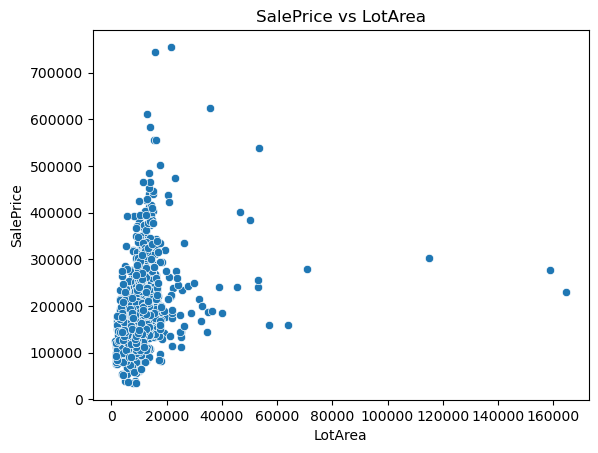

In [86]:
plt.title('SalePrice vs LotArea')
sns.scatterplot(data = df, x = 'LotArea', y = 'SalePrice');

There seems to be a linear relationship between the two, but it's not strong. We already saw this from their correlation coefficient of 0.27.</br> 
The reason the correlation is not as strong as we might have suspected might be that the lot area doesn't capture any information about the actual house. For example, two houses might have the same lot area but that doesn't say anything about the size of either of the houses.</br> 
Let's see if we can visualize this by adding the total number of rooms above ground as the color dimension:

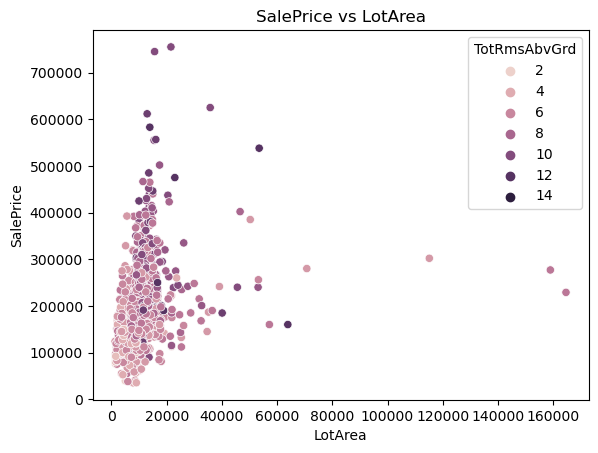

In [85]:
plt.title('SalePrice vs LotArea')
sns.scatterplot(data = df, x = 'LotArea', y = 'SalePrice',hue = 'TotRmsAbvGrd');

There seems to be some validity to our hypothesis. As we can see from the plot, the price of the house is higher for houses with more rooms, and houses with large lot areas but low prices seem to have a lower number of rooms. Of course, this is still not taking into account the area of the house and other relative variables. 

### TotalBsmtSF:

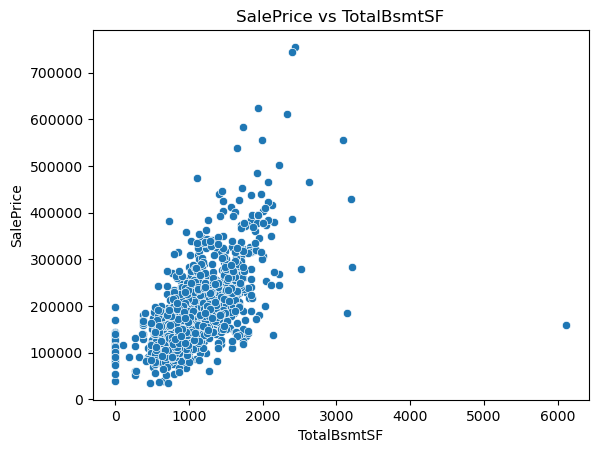

In [87]:
plt.title('SalePrice vs TotalBsmtSF')
sns.scatterplot(data = df, x = 'TotalBsmtSF', y = 'SalePrice');

TotalBsmtSF is better correlated with the sale price, this might be because it captures more information about the actual house.

### 1stFlrSF, 2ndFlrSF, and GrLivArea:

Let's explore how GrLivArea relates to the sum of 1stFlrSF and 2ndFlrSF:

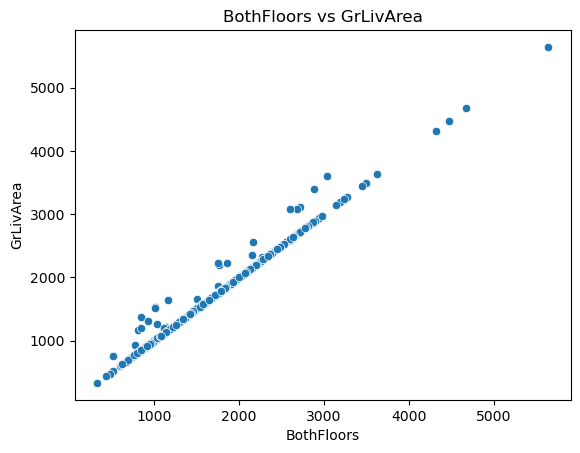

In [90]:
df['BothFloors'] = df['1stFlrSF'] + df['2ndFlrSF']
plt.title('BothFloors vs GrLivArea')
sns.scatterplot(data = df, x = 'BothFloors', y = 'GrLivArea');

This looks interesting. It seems that, in most cases, GrLivArea is the sum of 1stFlrSF and 2ndFlrSF.</br>
Let's double check this:

In [95]:
df[(df['GrLivArea'])!=df['BothFloors']].shape[0]

26

GrLivArea equals the sum of both floors except in 26 cases. 
We will probably end up using only BothFloors in our model.

### GarageArea, WoodDeckSF, and PoolArea:

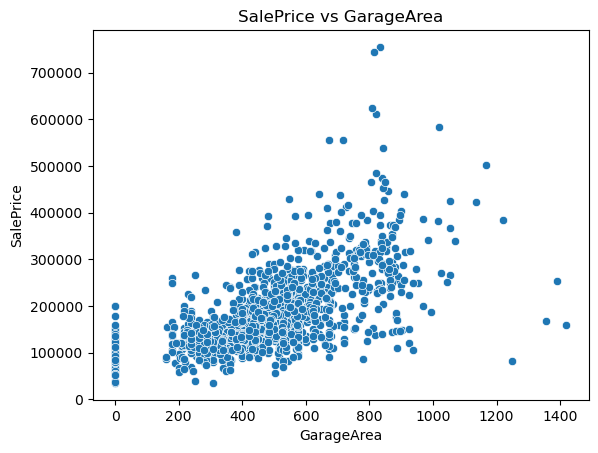

In [97]:
plt.title('SalePrice vs GarageArea')
sns.scatterplot(data = df, x = 'GarageArea', y = 'SalePrice');

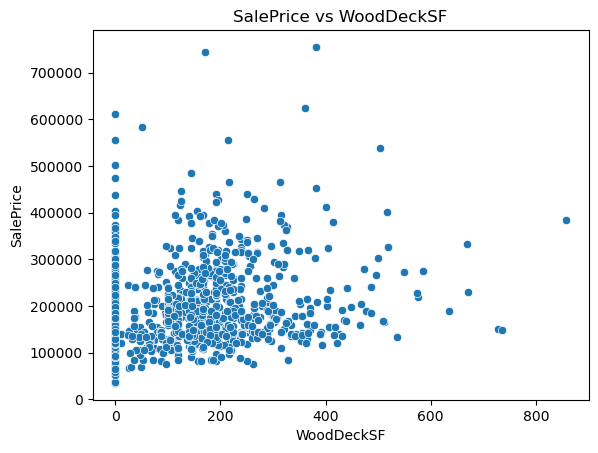

In [98]:
plt.title('SalePrice vs WoodDeckSF')
sns.scatterplot(data = df, x = 'WoodDeckSF', y = 'SalePrice');

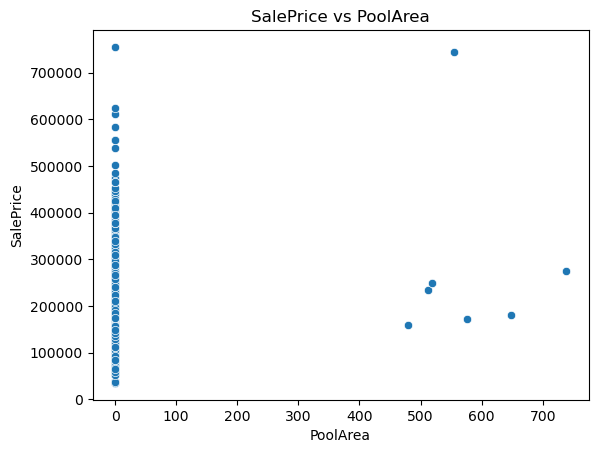

In [99]:
plt.title('SalePrice vs PoolArea')
sns.scatterplot(data = df, x = 'PoolArea', y = 'SalePrice');

___

## Time features and sale price: 

The time features we'll take a closer look at are:
- YearBuilt
- YearRemodAdd 
- GarageYrBuilt

### YearBuilt and YearRemodAdd:

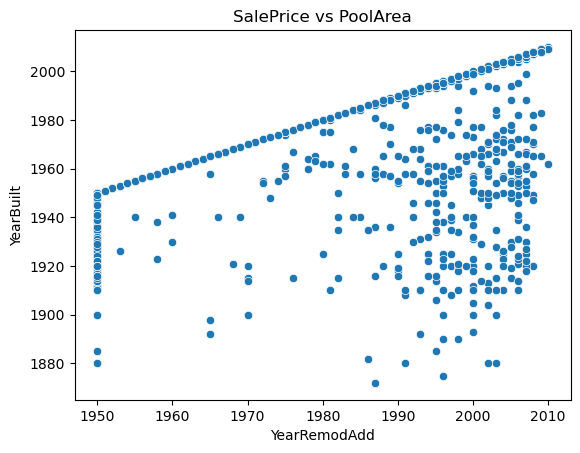

In [100]:
plt.title('YearRemodAdd vs YearBuilt')
sns.scatterplot(data = df, x = 'YearRemodAdd', y = 'YearBuilt');

This looks interesting. A second look at the column descriptions reveals that when there were no remodelings or additions to the house, YearRemodAdd is recorded as YearBuilt.
Since this might be misleading, a more appropriate way of conveying whether a house was remodeled or not could be by using a categorical Yes-or-No column:

In [116]:
RemodOrAdd = []
for i in range(len(df['YearBuilt'])):
    if df.iloc[i]['YearBuilt'] != df.iloc[i]['YearRemodAdd']:
        RemodOrAdd.append(1)
    else:
        RemodOrAdd.append(0) 

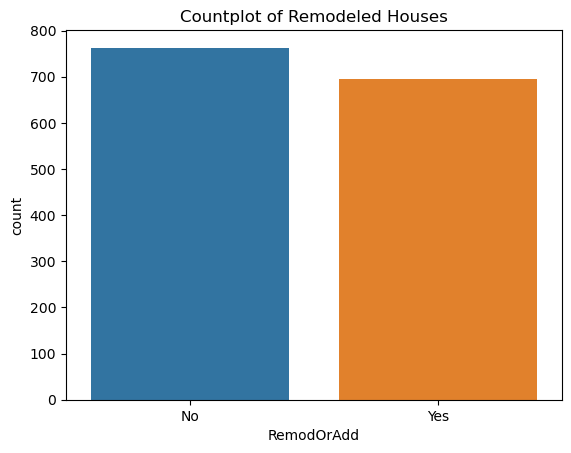

In [117]:
df['RemodOrAdd'] = pd.Series(RemodOrAdd)
plt.title('Countplot of Remodeled Houses')
g = sns.countplot(data = df, x = 'RemodOrAdd')
g.set_xticklabels(['No','Yes']);

### GarageYrBuilt:

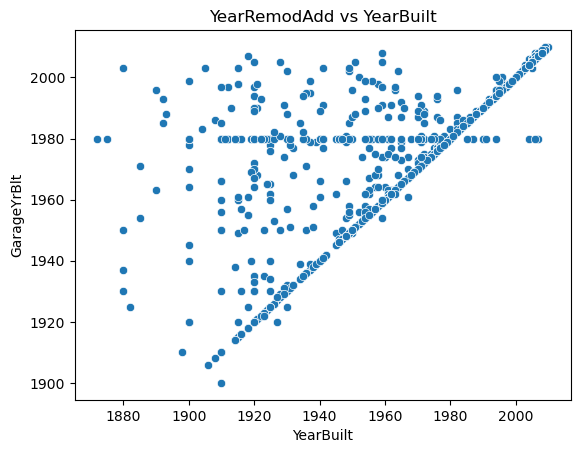

In [119]:
plt.title('YearRemodAdd vs YearBuilt')
sns.scatterplot(data = df, y = 'GarageYrBlt', x = 'YearBuilt');